#                       Insurance Preminum Prediction-ML

Description : This is Smople Basic model of Machine Learning which predicts the Prenium the of insurence based on some factors

In [323]:
# Machine Learning Life Cycle Steaps :
# Problem Definition
# Data Collection
# Data Cleaning
# Exploratory Data Analysis (EDA)
# Feature Engineering and Selection
# Data Preprocessing
# Data Spliting
# Model Selection
# Model Training
# Model Evaluation and Tuning
# Model Deployment
# Model Monitoring and Maintenance

Steap-1 : Problem Defination 

In [324]:
# pernimum variable is the contnious nature variable.so it comes in the Regression problem 
#of ML Learning i.e superviesd Learning 
#to predicit result based of Prenimum factor input by us0er. 

Steap-2 : Data Collecting 

In [325]:
import pandas as pd 
import numpy as np 

In [326]:
df=pd.read_csv("dataset.csv")

In [327]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


steap-3 : Data Cleaning 


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [329]:
print("dataset contains : ",df.shape[0]," Records and ",df.shape[1],"Coloumns and there names are ",df.columns)

dataset contains :  1338  Records and  7 Coloumns and there names are  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [330]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [331]:
df.duplicated().sum()

1

In [332]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [333]:
df.drop_duplicates(inplace=True)

In [334]:
df.duplicated().sum()

0

In [335]:
print(f'The dataset has {df.duplicated().sum()} duplicate values. It is the {(df.duplicated().sum() / len(df) * 100):.2f}% of the total data.')

The dataset has 0 duplicate values. It is the 0.00% of the total data.


Steap-4 : Exploratory Data Analysis-EDA

In [336]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [337]:
num_col= [col for col in df.columns if df[col].dtype!="O"] 

In [338]:
num_col

['age', 'bmi', 'children', 'expenses']

In [339]:
df[num_col].describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [340]:
obj_col= [col for col in df.columns if df[col].dtype=="O"]

In [341]:
obj_col

['sex', 'smoker', 'region']

In [342]:
df[obj_col].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


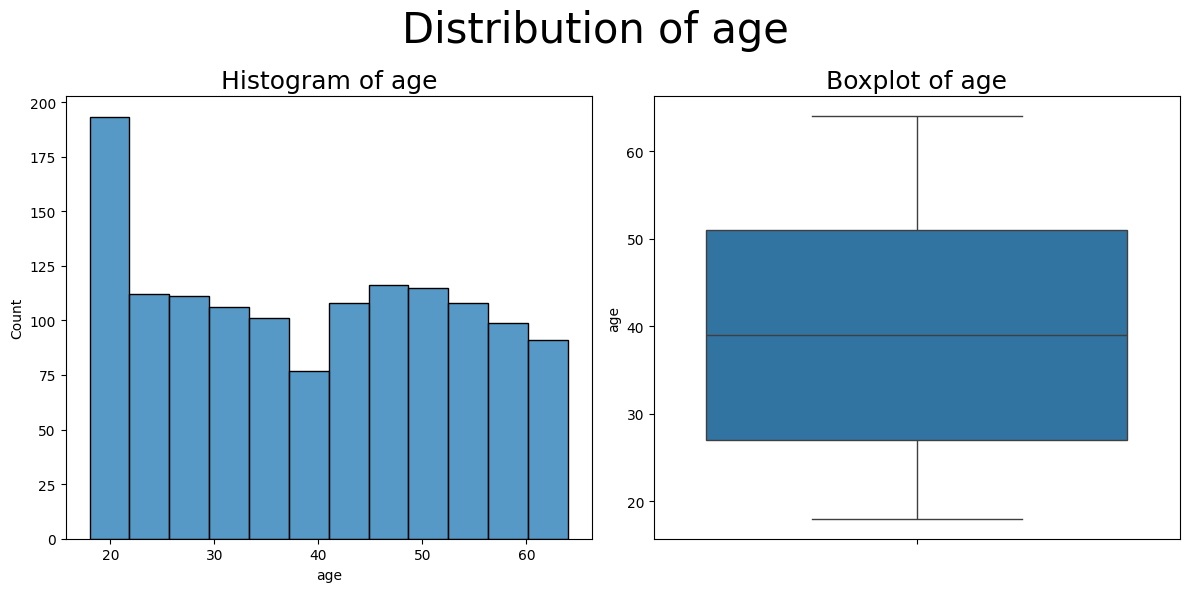

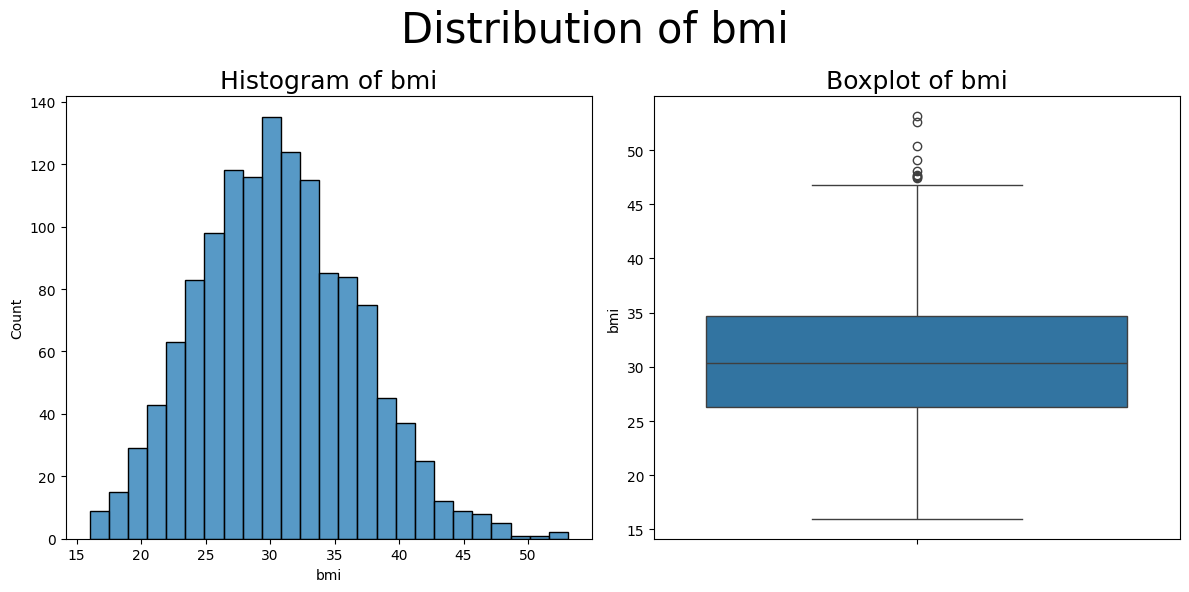

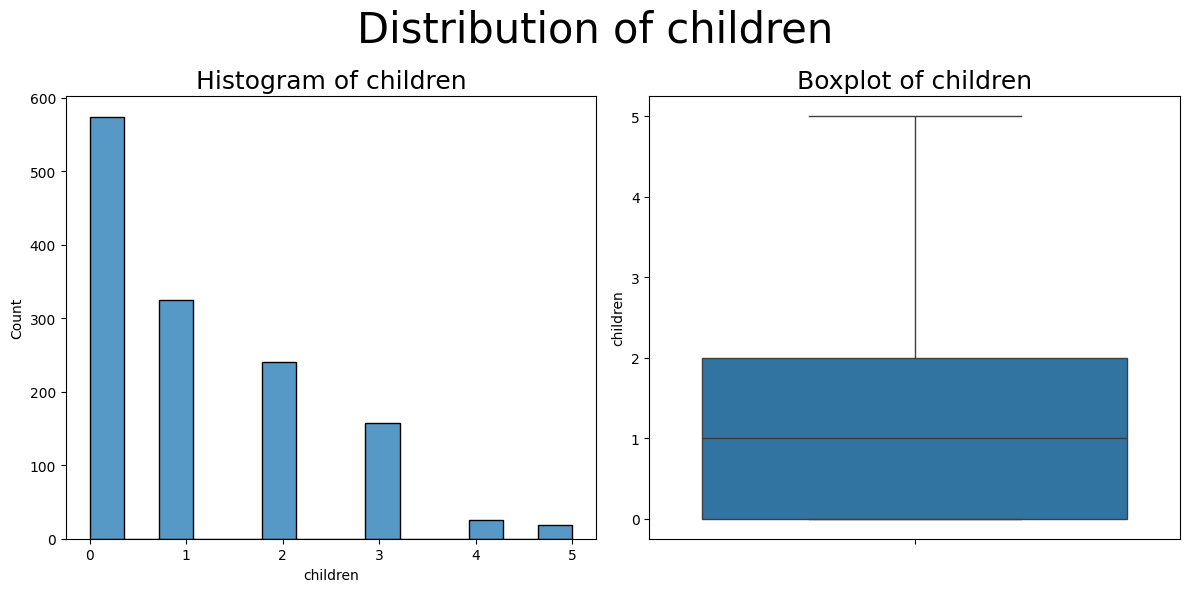

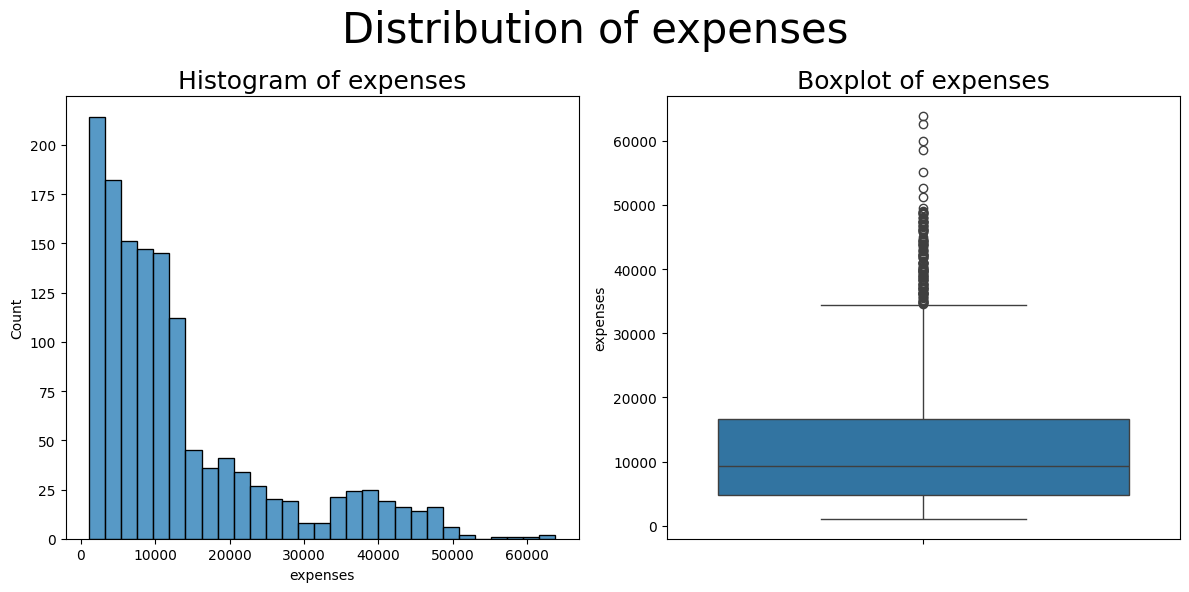

In [343]:
for i in range(4):
    fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

    ax1 = sns.histplot(df[num_col[i]],ax=ax1)
    ax1.set_title('Histogram of '+str(num_col[i]),fontsize=18)
    
    ax2 = sns.boxplot(df[num_col[i]],ax=ax2)
    ax2.set_title('Boxplot of '+str(num_col[i]),fontsize=18)

    plt.suptitle('Distribution of '+str(num_col[i]),fontsize=30)

    plt.tight_layout()

C:\Users\om\AppData\Local\Temp\ipykernel_14664\1476865970.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=9)


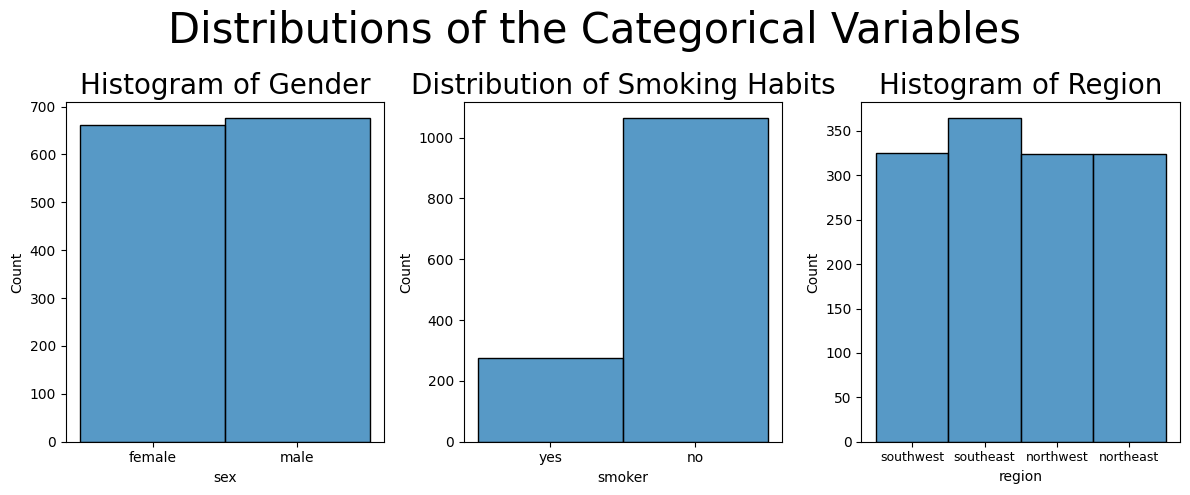

In [344]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,5))

ax1 = sns.histplot(df,x='sex',ax=ax1)
ax1.set_title('Histogram of Gender',size=20)

ax2 = sns.histplot(df,x='smoker',ax=ax2)
ax2.set_title('Distribution of Smoking Habits',size=20)

ax3 = sns.histplot(df,x='region',ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),fontsize=9)
ax3.set_title('Histogram of Region',size=20)

plt.suptitle('Distributions of the Categorical Variables',size=30)

plt.tight_layout()
plt.show()

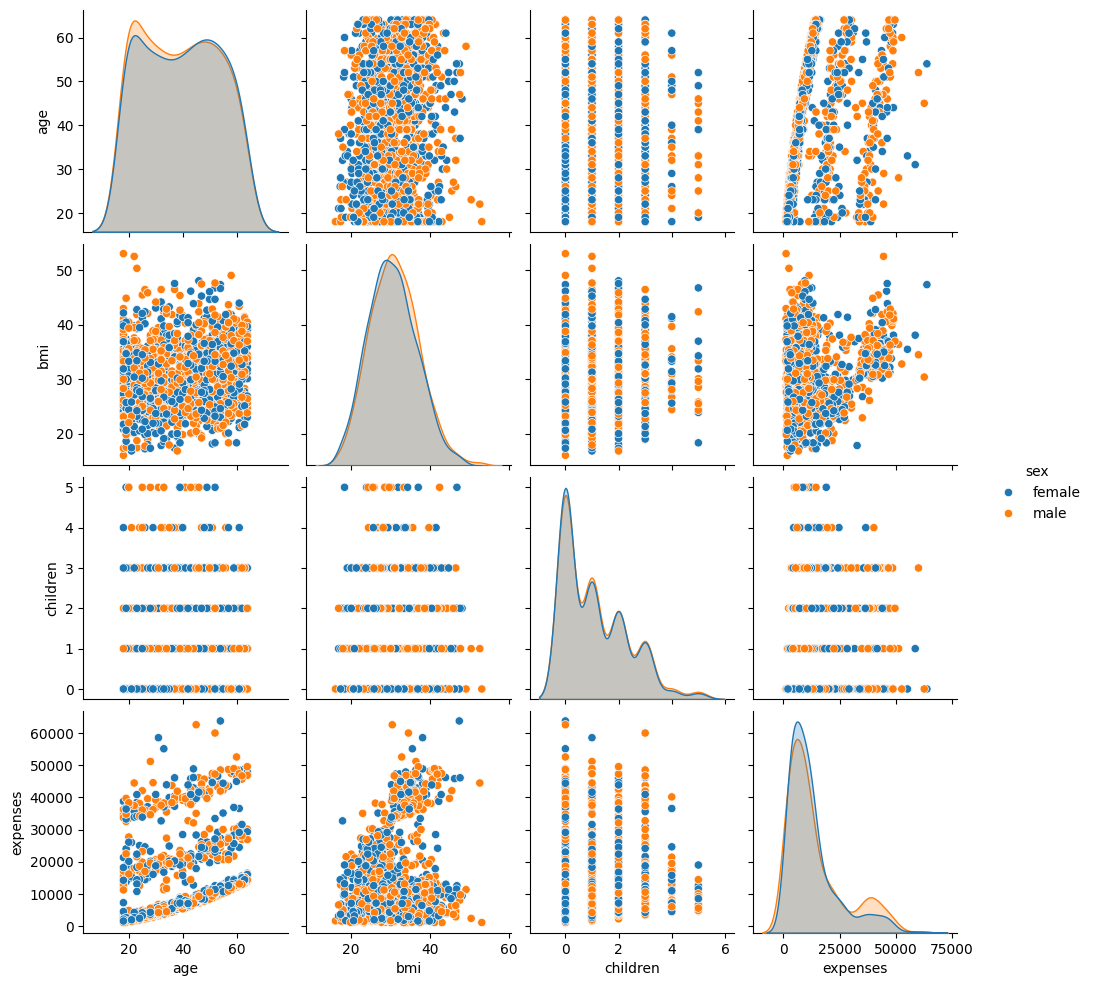

In [345]:
sns.pairplot(data=df,hue='sex')

<Figure size 1200x600 with 0 Axes>

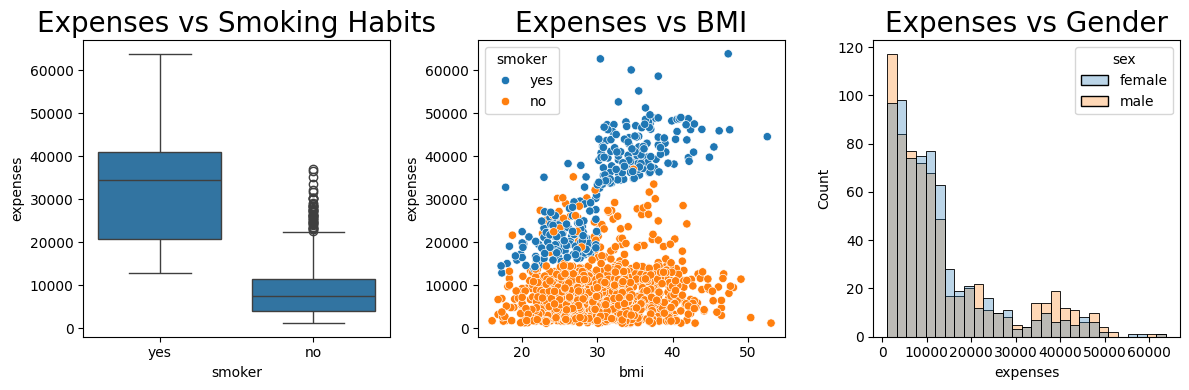

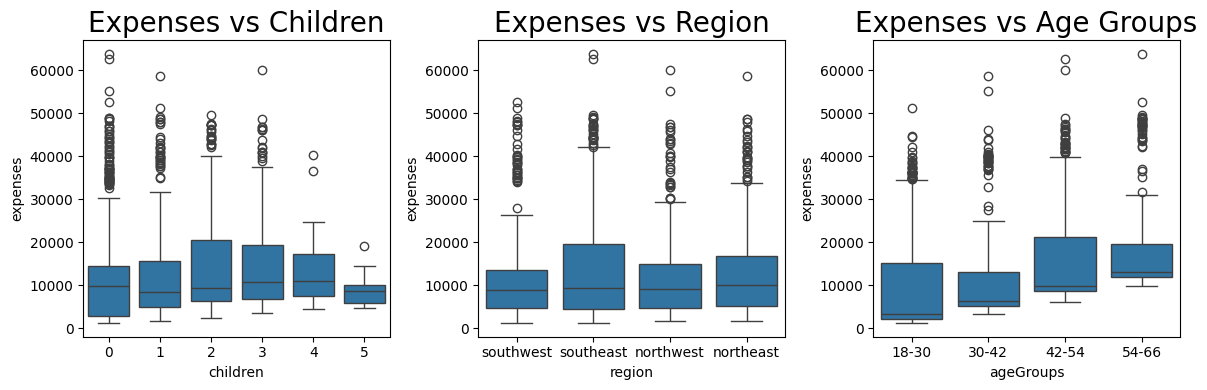

In [346]:
###########################################
age_bins = [18,30,42,54,66]
age_labels = [f"{i}-{i+12}" for i in range(18,66,12)]
df['ageGroups'] = pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
###########################################

fig = plt.figure(figsize=(12,6))
(topfig,bottomfig) = fig.subfigures(2,1)

topfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1)
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,4))

ax1 = sns.boxplot(data=df,y='expenses',x='smoker',ax=ax1)
ax1.set_title('Expenses vs Smoking Habits',size=20)

ax2 = sns.scatterplot(data=df,y='expenses',x='bmi',hue='smoker',ax=ax2)
ax2.set_title('Expenses vs BMI',size=20)

ax3 = sns.histplot(data=df,x='expenses',hue='sex',alpha=0.3,ax=ax3)
ax3.set_title('Expenses vs Gender',size=20)


plt.tight_layout() #in a single page

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1)
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,4))

ax1 = sns.boxplot(data=df,y='expenses',x='children',ax=ax1)
ax1.set_title('Expenses vs Children',size=20)

ax2 = sns.boxplot(data=df,y='expenses',x='region',ax=ax2)
ax2.set_title('Expenses vs Region',size=20)

ax3 = sns.boxplot(data=df,y='expenses',x='ageGroups',ax=ax3)
ax3.set_title('Expenses vs Age Groups',size=20)

plt.tight_layout()

In [347]:
df.groupby('children').agg(average_premium=('expenses','mean'),median_premium=('expenses','median')).reset_index()

,children,average_premium,median_premium
0,0,12384.695515,9863.470
1,1,12731.171821,8483.870
2,2,15073.564000,9264.980
3,3,15355.318535,10600.550
4,4,13850.656800,11033.660
5,5,8786.035556,8589.565


In [348]:
df.groupby('sex').agg(average_premium=('expenses','mean'),median_premium=('expenses','median')).reset_index()

,sex,average_premium,median_premium
0,female,12569.578897,9412.965
1,male,13974.999111,9377.900


<Figure size 1200x600 with 0 Axes>

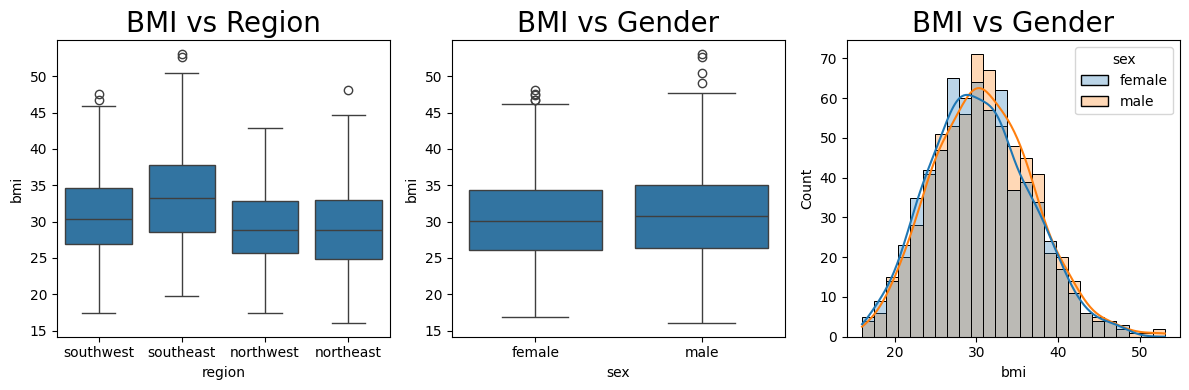

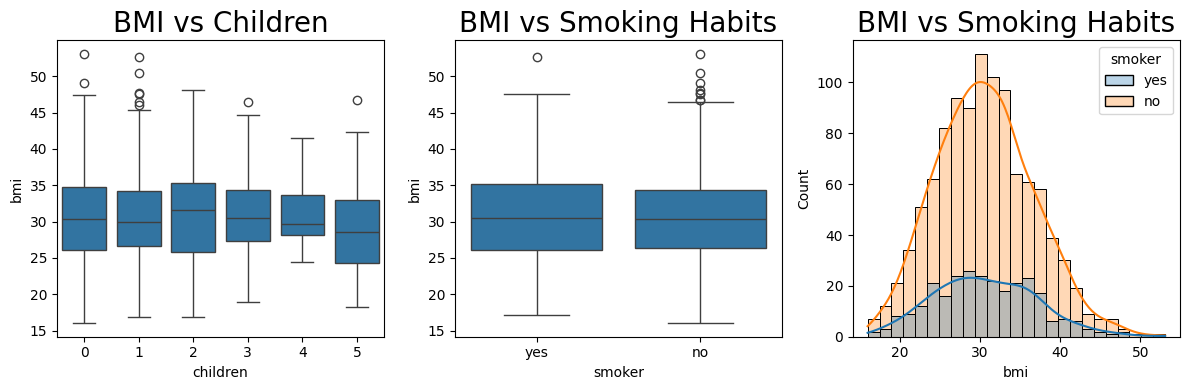

In [349]:
fig=plt.figure(figsize=(12,6))
(topfig,bottomfig)=fig.subfigures(2,1)

topfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1)
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))

ax1 = sns.boxplot(data=df,y='bmi',x='region',ax=ax1)
ax1.set_title('BMI vs Region',size=20)
ax2 = sns.boxplot(data=df,y='bmi',x='sex',ax=ax2)
ax2.set_title('BMI vs Gender',size=20)
ax3 = sns.histplot(data=df,x='bmi',hue='sex',ax=ax3,alpha=0.3,kde=True)
ax3.set_title('BMI vs Gender',size=20)

plt.tight_layout()

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.1,hspace=.1)
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,4))

ax1 = sns.boxplot(data=df,y='bmi',x='children',ax=ax1)
ax1.set_title('BMI vs Children',size=20)
ax2 = sns.boxplot(data=df,y='bmi',x='smoker',ax=ax2)
ax2.set_title('BMI vs Smoking Habits',size=20)
ax3 = sns.histplot(data=df,x='bmi',hue='smoker',alpha=0.3,kde=True,ax=ax3)
ax3.set_title('BMI vs Smoking Habits',size=20)

plt.tight_layout()

In [350]:
df.groupby('sex').agg(average_premium=('expenses','mean'),median_premium=('expenses','median')).reset_index()

,sex,average_premium,median_premium
0,female,12569.578897,9412.965
1,male,13974.999111,9377.900


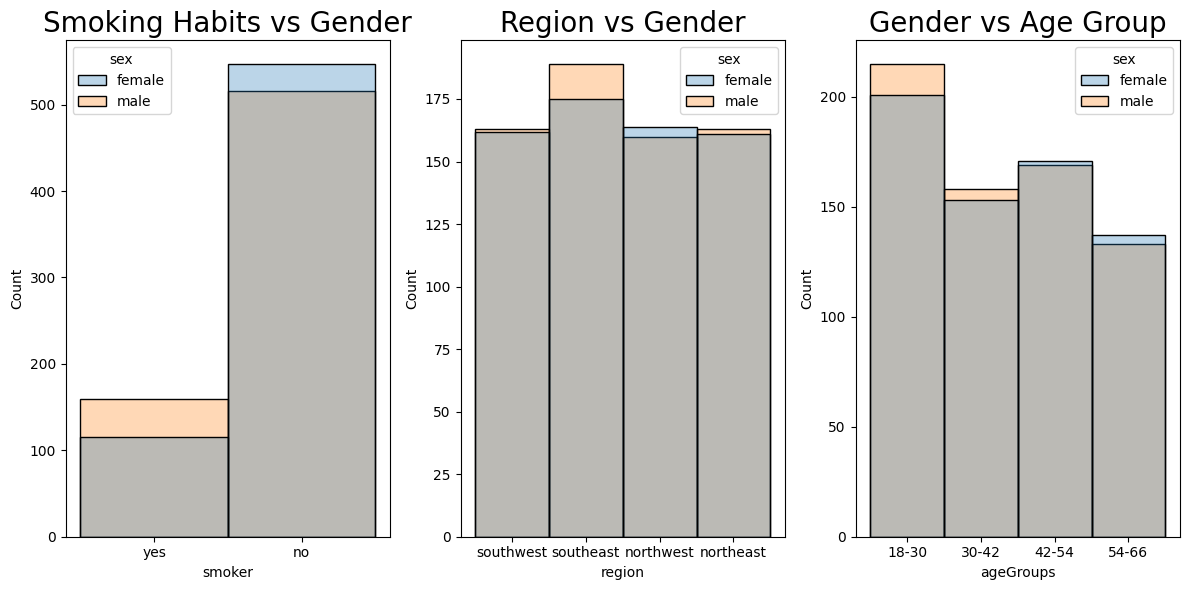

In [351]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

ax1 = sns.histplot(data=df,x='smoker',hue='sex',alpha=0.3,ax=ax1)
ax1.set_title('Smoking Habits vs Gender',size=20)

ax2 = sns.histplot(data=df,x='region',hue='sex',alpha=0.3,ax=ax2)
ax2.set_title('Region vs Gender',size=20)

ax3 = sns.histplot(data=df,x='ageGroups',hue='sex',alpha=0.3,ax=ax3)
ax3.set_title('Gender vs Age Group',size=20)

plt.tight_layout()

In [352]:
outliers_perc = []

for k,v in df[num_col].items():
    # Column must be of numeric type (not object)
    if df[k].dtype != 'O':
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        out_tuple = (k,int(perc))
        outliers_perc.append(out_tuple)
        print("Column %s outliers = %.1f%%" % (k,perc))

Column age outliers = 0.0%
Column bmi outliers = 0.7%
Column children outliers = 1.3%
Column expenses outliers = 10.4%


Steap-5 : Feature Engineering and Selection 


In [353]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'ageGroups'],
      dtype='object')

In [354]:
df["ageGroups"]

0       18-30
1       18-30
2       18-30
3       30-42
4       30-42
        ...  
1333    42-54
1334    18-30
1335    18-30
1336    18-30
1337    54-66
Name: ageGroups, Length: 1337, dtype: category
Categories (4, object): ['18-30' < '30-42' < '42-54' < '54-66']

In [355]:
df.drop("ageGroups",axis=1,inplace=True)

In [356]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


Steap-6 : Data Preprocessing 

In [357]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [358]:
obj_col

['sex', 'smoker', 'region']

In [359]:
for i in obj_col:
    print(df[i].value_counts())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [360]:
# there is no larger no of the coloumns we use the Ordinal Encoding 

In [361]:
obj_col=df.select_dtypes(include="O")

In [362]:
obj_col

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [363]:
encoder=OrdinalEncoder()

In [364]:
encoder.fit(obj_col)

OrdinalEncoder()

In [365]:
encoder_data=encoder.transform(obj_col)

In [366]:
encoder_data

array([[0., 1., 3.],
       [1., 0., 2.],
       [1., 0., 2.],
       ...,
       [0., 0., 2.],
       [0., 0., 3.],
       [0., 1., 1.]])

In [367]:
encoder_coloumns=encoder.get_feature_names_out()

In [368]:
cal2=pd.DataFrame(encoder_data,columns=encoder_coloumns)

In [369]:
cal2

,sex,smoker,region
0,0.0,1.0,3.0
1,1.0,0.0,2.0
2,1.0,0.0,2.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
1332,1.0,0.0,1.0
1333,0.0,0.0,0.0
1334,0.0,0.0,2.0
1335,0.0,0.0,3.0


In [370]:
obj_col

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [371]:
num_col=df.select_dtypes(exclude="O")

In [372]:
num_col

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [373]:
#combing the both the data frame into one 
final_df=pd.concat([cal2,num_col],axis=1)

In [374]:
final_df 

,sex,smoker,region,age,bmi,children,expenses
0,0.0,1.0,3.0,19.0,27.9,0.0,16884.92
1,1.0,0.0,2.0,18.0,33.8,1.0,1725.55
2,1.0,0.0,2.0,28.0,33.0,3.0,4449.46
3,1.0,0.0,1.0,33.0,22.7,0.0,21984.47
4,1.0,0.0,1.0,32.0,28.9,0.0,3866.86
...,...,...,...,...,...,...,...
1333,0.0,0.0,0.0,50.0,31.0,3.0,10600.55
1334,0.0,0.0,2.0,18.0,31.9,0.0,2205.98
1335,0.0,0.0,3.0,18.0,36.9,0.0,1629.83
1336,0.0,1.0,1.0,21.0,25.8,0.0,2007.95


In [375]:
final_df.index

RangeIndex(start=0, stop=1338, step=1)

In [376]:
final_df.index=range(len(final_df))

In [377]:
final_df #finally encoded data 

,sex,smoker,region,age,bmi,children,expenses
0,0.0,1.0,3.0,19.0,27.9,0.0,16884.92
1,1.0,0.0,2.0,18.0,33.8,1.0,1725.55
2,1.0,0.0,2.0,28.0,33.0,3.0,4449.46
3,1.0,0.0,1.0,33.0,22.7,0.0,21984.47
4,1.0,0.0,1.0,32.0,28.9,0.0,3866.86
...,...,...,...,...,...,...,...
1333,0.0,0.0,0.0,50.0,31.0,3.0,10600.55
1334,0.0,0.0,2.0,18.0,31.9,0.0,2205.98
1335,0.0,0.0,3.0,18.0,36.9,0.0,1629.83
1336,0.0,1.0,1.0,21.0,25.8,0.0,2007.95


steap-7 : data Spliting 

In [378]:
df=final_df

In [379]:
df.dropna(inplace=True)

In [380]:
x=df.drop("expenses",axis=1)

In [381]:
y=df["expenses"]

In [382]:
x


,sex,smoker,region,age,bmi,children
0,0.0,1.0,3.0,19.0,27.9,0.0
1,1.0,0.0,2.0,18.0,33.8,1.0
2,1.0,0.0,2.0,28.0,33.0,3.0
3,1.0,0.0,1.0,33.0,22.7,0.0
4,1.0,0.0,1.0,32.0,28.9,0.0
...,...,...,...,...,...,...
1332,1.0,0.0,1.0,52.0,44.7,3.0
1333,0.0,0.0,0.0,50.0,31.0,3.0
1334,0.0,0.0,2.0,18.0,31.9,0.0
1335,0.0,0.0,3.0,18.0,36.9,0.0


In [383]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1332    11411.69
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
Name: expenses, Length: 1336, dtype: float64

In [384]:
from sklearn.model_selection import train_test_split

In [385]:
#whole data set is split into 4 variables
# 1.x_train 80% of x
# 2.x_test 20% of x 
# 3.y_train 80% of y
# 4.y_test 20% of y


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [386]:
x_train

,sex,smoker,region,age,bmi,children
1113,1.0,0.0,0.0,28.0,26.3,3.0
967,1.0,0.0,0.0,44.0,25.4,1.0
599,0.0,0.0,2.0,52.0,37.5,2.0
170,1.0,0.0,2.0,63.0,41.5,0.0
275,0.0,0.0,0.0,47.0,26.6,2.0
...,...,...,...,...,...,...
1096,1.0,0.0,2.0,51.0,35.0,2.0
1131,1.0,0.0,0.0,27.0,45.9,2.0
1295,1.0,0.0,0.0,20.0,22.0,1.0
861,0.0,0.0,1.0,38.0,28.0,3.0


In [387]:
x_test

,sex,smoker,region,age,bmi,children
899,1.0,0.0,0.0,19.0,22.5,0.0
1063,0.0,0.0,3.0,36.0,28.6,3.0
1255,0.0,0.0,1.0,42.0,37.9,0.0
298,1.0,1.0,1.0,31.0,34.4,3.0
237,1.0,0.0,2.0,31.0,38.4,2.0
...,...,...,...,...,...,...
534,1.0,0.0,2.0,64.0,40.5,0.0
542,0.0,0.0,2.0,63.0,36.3,0.0
896,1.0,0.0,1.0,43.0,20.0,2.0
1093,0.0,0.0,3.0,22.0,30.4,0.0


In [388]:
y_train

1113     5312.17
967      7518.03
599     33471.97
170     13405.39
275      9715.84
          ...   
1096    44641.20
1131     3693.43
1295     1964.78
861      7151.09
1127     5836.52
Name: expenses, Length: 1068, dtype: float64

In [389]:
y_test

899      2117.34
1063     6548.20
1255     6474.01
298     38746.36
237      4463.21
          ...   
534     13831.12
542     13887.20
896     19798.05
1093    33907.55
1284    47403.88
Name: expenses, Length: 268, dtype: float64

Steap-8 : Model Selection 

In [390]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


Steap-9 : Model Traning 

In [391]:
#creating the object 
lnr=LinearRegression()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
lst_reg=[lnr,dtr,gbr,rfr]

In [392]:
df.isna().sum()

sex         0
smoker      0
region      0
age         0
bmi         0
children    0
expenses    0
dtype: int64

In [393]:
df.dropna(inplace=True)

In [394]:
df.isna().sum()

sex         0
smoker      0
region      0
age         0
bmi         0
children    0
expenses    0
dtype: int64

In [399]:
for i in lst_reg:
    i.fit(x_train,y_train)
    print("Traing Score of ",i," : ",i.score(x_train,y_train)*100)
    print("Testing Score of ",i," : ",i.score(x_test,y_test)*100)
    

Traing Score of  LinearRegression()  :  22.324873249402387
Testing Score of  LinearRegression()  :  23.60522166529826
Traing Score of  DecisionTreeRegressor()  :  100.0
Testing Score of  DecisionTreeRegressor()  :  -56.490388384454214
Traing Score of  GradientBoostingRegressor()  :  45.08834104725601
Testing Score of  GradientBoostingRegressor()  :  20.792759883094714
Traing Score of  RandomForestRegressor()  :  87.63034612052319
Testing Score of  RandomForestRegressor()  :  15.640296886456117


In [ ]:
for i in lst_reg:
    i.fit(x_train,y_train)
    print("Prediction Score of ",i," : ",i.predict(x_test))
    


KeyError: 0